In [73]:
import numpy as np 
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import random

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.optimizers import Adam
import seaborn as sns
from sklearn.metrics import confusion_matrix

import cv2 as cv

keras.layers.Dense, keras.layers.Flatten, keras.layers.Conv2D, keras.layers.MaxPooling2D, and keras.layers.Dropout are classes that provide various types of layers that can be added to a neural network model.
keras.optimizers.Adam is a class that provides the Adam optimization algorithm, which is a popular algorithm for training neural networks.
cv2 (imported as cv) is a library for working with images and performing various image processing tasks

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

This line of code loads the Fashion-MNIST dataset using the load_data function from the keras.datasets.fashion_mnist module. The Fashion-MNIST dataset is a collection of 70,000 grayscale images of clothing items, divided into 10 categories. The images have a resolution of 28x28 pixels

In [3]:
print("shape of x_train is {} and of y_trainis {}".format(x_train.shape,y_train.shape))
print("\nshape of x_test is {} and y_test is {}".format(x_test.shape,y_test.shape))

shape of x_train is (60000, 28, 28) and of y_trainis (60000,)

shape of x_test is (10000, 28, 28) and y_test is (10000,)


The first print statement uses the format method of strings to insert the shapes of the x_train and y_train arrays into a formatted string. The second print statement does the same for the x_test and y_test arrays.

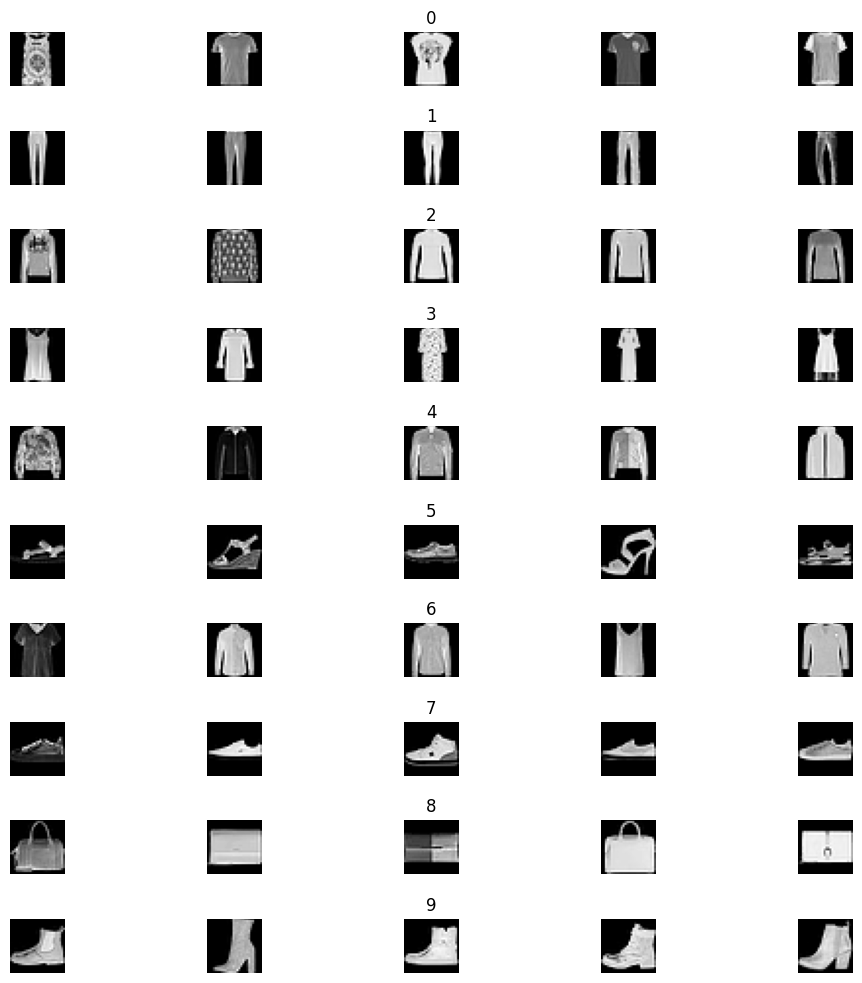

In [4]:
x_class_num = []
n_rows = 10
n_cols = 5
fig,ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,10))
fig.tight_layout()
for i in range(n_cols):
    for j in range(n_rows):
        x_select = x_train[y_train==j]
        ax[j][i].imshow(x_select[random.randint(0,len(x_select-1)),:,:],cmap='gray')
        ax[j][i].axis("off")
        
        if i==2:
            ax[j][i].set_title(str(j))
            x_class_num.append(len(x_select))

This block of code creates a 10x5 grid of subplots, where each row represents one of the 10 classes in the Fashion-MNIST dataset, and each column displays a randomly selected image from that class. The middle column of subplots is labeled with the class label. The code also counts the number of images in each class and stores the counts in the x_class_num list.

In [5]:
inp_sh = 28
batch_size =inp_sh
n_class=10

input_sh = (inp_sh,inp_sh,1)

x_train= x_train/255.
x_train=x_train.astype(float)

x_test= x_test/255.
x_test=x_test.astype(float)

This block of code sets the values of several hyperparameters for a machine learning model, including the size of the input images, the batch size, and the number of classes. It also preprocesses the training and test data by scaling the pixel values to the range [0, 1] and converting the data type to float

In [62]:
labels = {1: 'T-shirt/top',
2: 'Trouser',
3: 'Pullover',
4: 'Dress',
5: 'Coat',
6: 'Sandal',
7: 'Shirt',
8: 'Sneaker',
9: 'Bag',
10: 'Ankle boot',
          
}

labels contain the column name for respective column number

In [6]:
x_train.shape

(60000, 28, 28)

Python code. x_train.shape is a way to get the dimensions of the x_train array, which is usually used to store the training data for a machine learning model. For example, if x_train has 1000 rows and 4 columns, then x_train.shape will return (1000, 4).

In [7]:
x_train = np.array(x_train)
x_test = np.array(x_test)


the numpy library to convert the x_train and x_test lists into numpy arrays. This is a common step in preparing the data for machine learning models, as numpy arrays are more efficient and convenient to work with than regular Python lists

In [8]:
x_train = x_train.reshape(x_train.shape[0],inp_shape,inp_shape,1)
x_test = x_test.reshape(x_test.shape[0],inp_shape,inp_shape,1)

reshaping the x_train and x_test arrays to have four dimensions. This is usually done when you are working with image data, as each image can be represented as a matrix of pixels with a certain height, width and number of channels

In [9]:
x_train.shape

(60000, 28, 28, 1)

x_train.shape will return the shape of the x_train array, which is (1000, 28, 28, 1) in this case

In [10]:
y_train.shape

(60000,)

y_train.shape will return the shape of the y_train array, which is usually used to store the labels or targets for the training data

In [11]:
y_train = to_categorical(y_train,n_class)
y_test = to_categorical(y_test,n_class)

 using the to_categorical function from the keras library to convert the y_train and y_test arrays to one-hot encoding. This is a common step in preparing the labels for classification problems, as one-hot encoding makes it easier to compare the predictions of the model with the true labels

In [12]:
y_train.shape

(60000, 10)

y_train.shape will return the shape of the y_train array,

In [13]:
model = Sequential()

model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=60, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=80, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Conv2D(filters=140, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=n_class, activation="softmax"))



creating a convolutional neural network (CNN) model using the keras library. A CNN is a type of deep learning model that is especially good at processing image data, as it can learn to extract features from the pixels using convolutional filters. Your model has four convolutional layers, each followed by a max pooling layer to reduce the spatial dimensions and increase the efficiency. The last convolutional layer is flattened to a one-dimensional vector, which is then fed into three fully connected layers, also known as dense layers. The final layer has n_class units and uses the softmax activation function to output a probability distribution over the classes.

In [14]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 60)        16260     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 60)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 80)          43280     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 80)         0

compiling the model using the Adam optimizer, which is a popular choice for gradient-based optimization algorithms. You are also specifying the loss function as categorical crossentropy, which is suitable for multi-class classification problems with one-hot encoded labels. You are also choosing to monitor the accuracy metric, which measures the fraction of correct predictions. The model.summary() method will print a table that shows the name, output shape and number of parameters of each layer in the model, as well as the total number of trainable and non-trainable parameters in the model.

In [15]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=28,
    verbose=1,
    batch_size=batch_size,
    shuffle=True
)


Epoch 1/28
1500/1500 [==============================] - 12s 4ms/step - loss: 0.5511 - accuracy: 0.7910 - val_loss: 0.3966 - val_accuracy: 0.8619
Epoch 2/28
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3347 - accuracy: 0.8776 - val_loss: 0.3110 - val_accuracy: 0.8874
Epoch 3/28
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2836 - accuracy: 0.8947 - val_loss: 0.2855 - val_accuracy: 0.8953
Epoch 4/28
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2525 - accuracy: 0.9071 - val_loss: 0.2968 - val_accuracy: 0.8925
Epoch 5/28
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2289 - accuracy: 0.9162 - val_loss: 0.2901 - val_accuracy: 0.8973
Epoch 6/28
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2105 - accuracy: 0.9217 - val_loss: 0.2657 - val_accuracy: 0.9068
Epoch 7/28
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1901 - accuracy: 0.9301 - val_loss: 0.2754 - val_accuracy

 fitting the model on x_train and y_train using the model.fit() method. You are also specifying some parameters, such as validation_split, which will split the training data into a training set and a validation set, epochs, which will determine how many times the model will go through the entire training data, verbose, which will control how much information is printed during the training process, batch_size, which will determine how many samples are processed at a time, and shuffle, which will randomize the order of the samples in each epoch

In [16]:
score = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6049 - accuracy: 0.9006


evaluating the model on x_test and y_test using the model.evaluate() method. This will compute the loss and accuracy of the model on the test data, which is a measure of how well the model generalizes to unseen data. The model.evaluate() method will return a score object, which is a list that contains the values of the loss and accuracy for the test data

In [17]:
print("test loss is :",score[0])
print("test accuracy is :",score[1])

test loss is : 0.6049343347549438
test accuracy is : 0.900600016117096


printing the score object using the print() function. This will display the values of the test loss and test accuracy on the screen

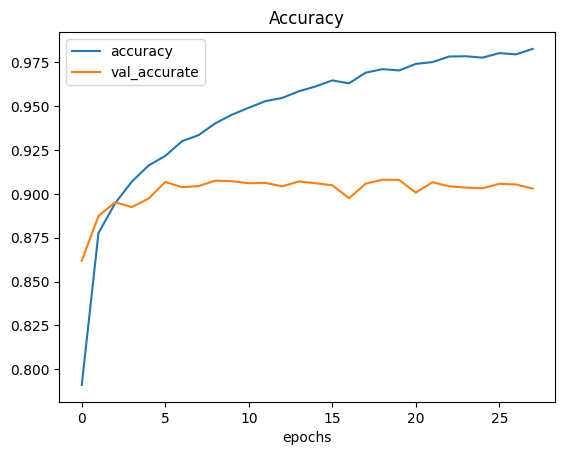

In [18]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs")
plt.legend(["accuracy","val_accurate"])
plt.title("Accuracy")
plt.show()

 plotting the learning curves for the accuracy metric using the matplotlib library. A learning curve is a graph that shows how the model performance changes over the epochs. You are using the plt.plot() function to draw two lines, one for the training accuracy and one for the validation accuracy. You are also using the plt.xlabel(), plt.legend() and plt.title() functions to add labels, legends and titles to the plot. You are using the plt.show() function to display the plot on the screen

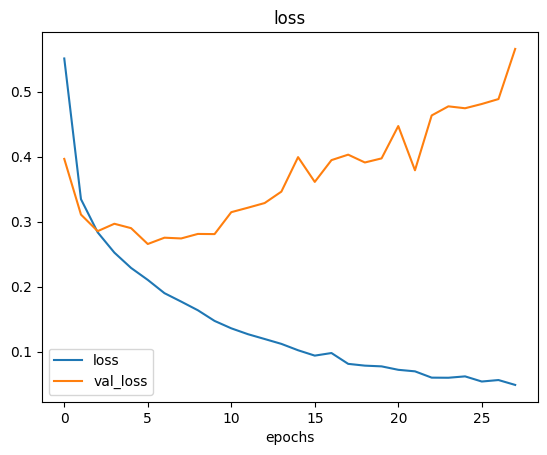

In [19]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.legend(["loss", "val_loss"])
plt.title("loss")
plt.show()


plotting the learning curves for the loss metric using the matplotlib library. A learning curve is a graph that shows how the model performance changes over the epochs. You are using the plt.plot() function to draw two lines, one for the training loss and one for the validation loss. You are also using the plt.xlabel(), plt.legend() and plt.title() functions to add labels, legends and titles to the plot. You are using the plt.show() function to display the plot on the screen

1875/1875 [==============================] - 4s 2ms/step


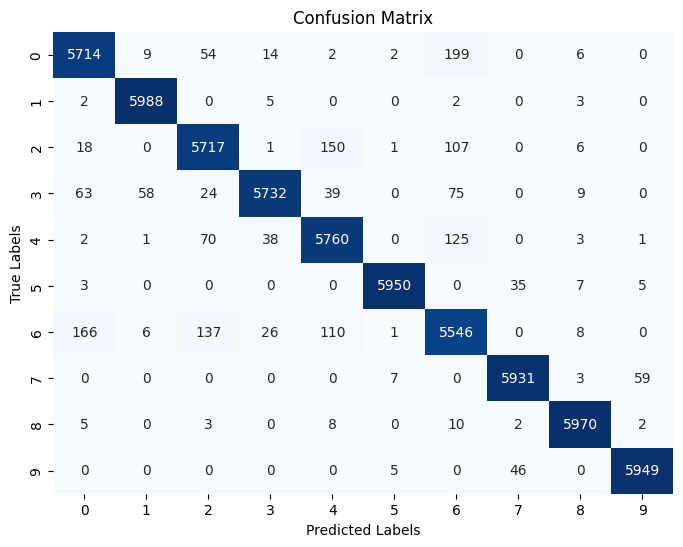

In [74]:
y_pred = model.predict(x_train)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Convert true labels to class labels
y_true_classes = np.argmax(y_train, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [75]:

def get_label(input_class):
    num=int(input_class)
    if num == 0:
        return "Tshirt/top"
    if num == 1:
        return "trouser"
    
    if num ==2:
        return "Pullover"
    if num ==3:
        return "Dress"
    if num ==4:
        return "Coat"
    if num ==5:
        return "Sandal"
    if num ==6:
        return "Shirt"
    if num ==7:
        return "Sneaker"
    
    if num ==8:
        return "Bag"
    if num ==9:
        return "Ankle boot"

    
def draw_test(name, pred, actual, input_img):
    BLACK = [255, 255, 0]

    res = get_label(pred)
    expanded_image = cv.copyMakeBorder(input_img, 0, 0, 0, 4 * input_img.shape[0], cv.BORDER_CONSTANT, value=BLACK)
    #expanded_image = cv.cvtColor(expanded_image, cv.COLOR_BGR2GRAY)
    cv.putText(expanded_image, "Predicted - " + str(res), (350, 70), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
    cv.putText(expanded_image, "\nActual - " + str(actual), (1000, 1500), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255))
    cv.imshow(name, expanded_image)

   
#for _ in range(10):
  
    
while True:
    k = cv.waitKey(0)
    if k%256 == 27:
        print("escape hit")
        break
        
    else:
        random_num = np.random.randint(0, len(x_test))
        input_im = x_test[random_num]
        actual = y_test[random_num].argmax(axis=0)
        imageL = cv.resize(input_im, None, fx=10, fy=10, interpolation=cv.INTER_CUBIC)
        input_im = input_im.reshape(1, 28, 28, 1)

    
        probs = model.predict(input_im)

   
        res = np.argmax(probs)
     
        draw_test("prediction", res, actual, imageL)
        cv.waitKey(1)
        
cv.destroyAllWindows()


1/1 [==============================] - 0s 22ms/step
escape hit


The code snippet is used to make predictions on new images using the model that was trained on the fashion MNIST dataset. The code snippet uses the cv2 library to handle the image processing and display.
while True: # Wait for a keyboard input k = cv.waitKey(1) # If the escape key is pressed, break the loop if k%256 == 27: print(“escape hit”) break # If any other key is pressed then: random_num = np.random.randint(0, len(x_test)) input_im = x_test[random_num] # Get the actual label of the image actual = y_test[random_num].argmax(axis=0) # Resize the image to make it bigger imageL = cv.resize(input_im, None, fx=10, fy=10, interpolation=cv.INTER_CUBIC) # Reshape the image to match the model input shape input_im = input_im.reshape(1, 28, 28, 1)

In [80]:
"""path = "C:/Users/arpit/Downloads/ASI9799_1000_1.jpg"
input_image = cv.imread(path, cv.IMREAD_GRAYSCALE)
#input_images = cv2.imread(test[0])
#input_image = cv2.imread(y_test[0])
# Normalize the pixel values
input_image = input_image / 255.0

# Resize the image to 28x28 pixels
input_image = cv.resize(input_image, (28, 28))
input_image = input_image.reshape(1, 28, 28, 1)
predictions = model.predict(input_image)
print(predictions)

predicted_class = np.argmax(predictions)

print(f' label={labels[predicted_class]}')"""


1/1 [==============================] - 0s 31ms/step
[[7.0958102e-08 2.2421382e-19 4.9357158e-01 1.4475964e-09 4.3464439e-08
  6.3011085e-17 5.8791059e-08 2.4542942e-17 5.0642830e-01 2.8153702e-21]]
 label=Sneaker


the above code is useful to predict an image downloaded in the system. For that we will just have to replace path by the path of the downloaded image and the image will be converted into greyscale and respective label will be printed

In [81]:
"""
import os
os.getcwd()
os.chdir('D:/opencv_img')
os.getcwd()
save_dir = "D:/opencv_img"

cam = cv.VideoCapture(0)
cv.namedWindow("Python webcam")
img_counter = 0


while True:
    ret,frame = cam.read()
    if not ret:
        print("Error in grabbing frame")
    cv.imshow("test",frame)
    k = cv.waitKey(1)
    if k%256 == 27:
        print("escape hit")
        break
    elif k%256 == 32:
        img_name = "opencv_frame{}.png".format(img_counter)
        print(img_name)
        cv.imwrite(img_name,frame)
        print("screenshot taken")
        save_path = os.path.join(save_dir, img_name)
        print(save_path)
        img_counter+=1
        
        #img = cv.imread(save_path)
        gray=cv.imread(save_path,cv.IMREAD_GRAYSCALE)
        #gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        
        cv.imshow("Gray",gray)
        resized = cv.resize(gray, (28, 28))
        
        
cam.release()
cv.destroyAllWindows()
print(img_name)
"""

opencv_frame0.png
screenshot taken
D:/opencv_img\opencv_frame0.png
escape hit
opencv_frame0.png


The above code takes a screenshot from the webcam and stores in in the save_dir path having name of that image.We are working upon creating more specific predictions by taking images from webcam and then precidting about the fashion category it belong to.